### 1. Reading,undertanding and visualizing data

In [31]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
## reading data
bike_data = pd.read_csv('day.csv')

In [4]:
## understanding the data
bike_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bike_data.shape

(730, 16)

In [6]:
## dropping casual and registered columns
bike_data.drop(['casual', 'registered'], inplace=True, axis = 1)
bike_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600

In [7]:
#Checking if there is any missing value.
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [10]:
## checking for outliers
bike_data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

#### Since the mean and median are significantly close to each other , we can say that the data does not contain outliers

In [9]:
## checking data types of the columns
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [11]:
## chnaging data types categorical variables
bike_data['season']= bike_data['season'].astype(object)
bike_data['yr']= bike_data['yr'].astype(object)
bike_data['mnth']= bike_data['mnth'].astype(object)
bike_data['holiday']= bike_data['holiday'].astype(object)
bike_data['weekday']= bike_data['weekday'].astype(object)
bike_data['workingday']= bike_data['workingday'].astype(object)
bike_data['weathersit']= bike_data['weathersit'].astype(object)
bike_data.dtypes

instant         int64
dteday         object
season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

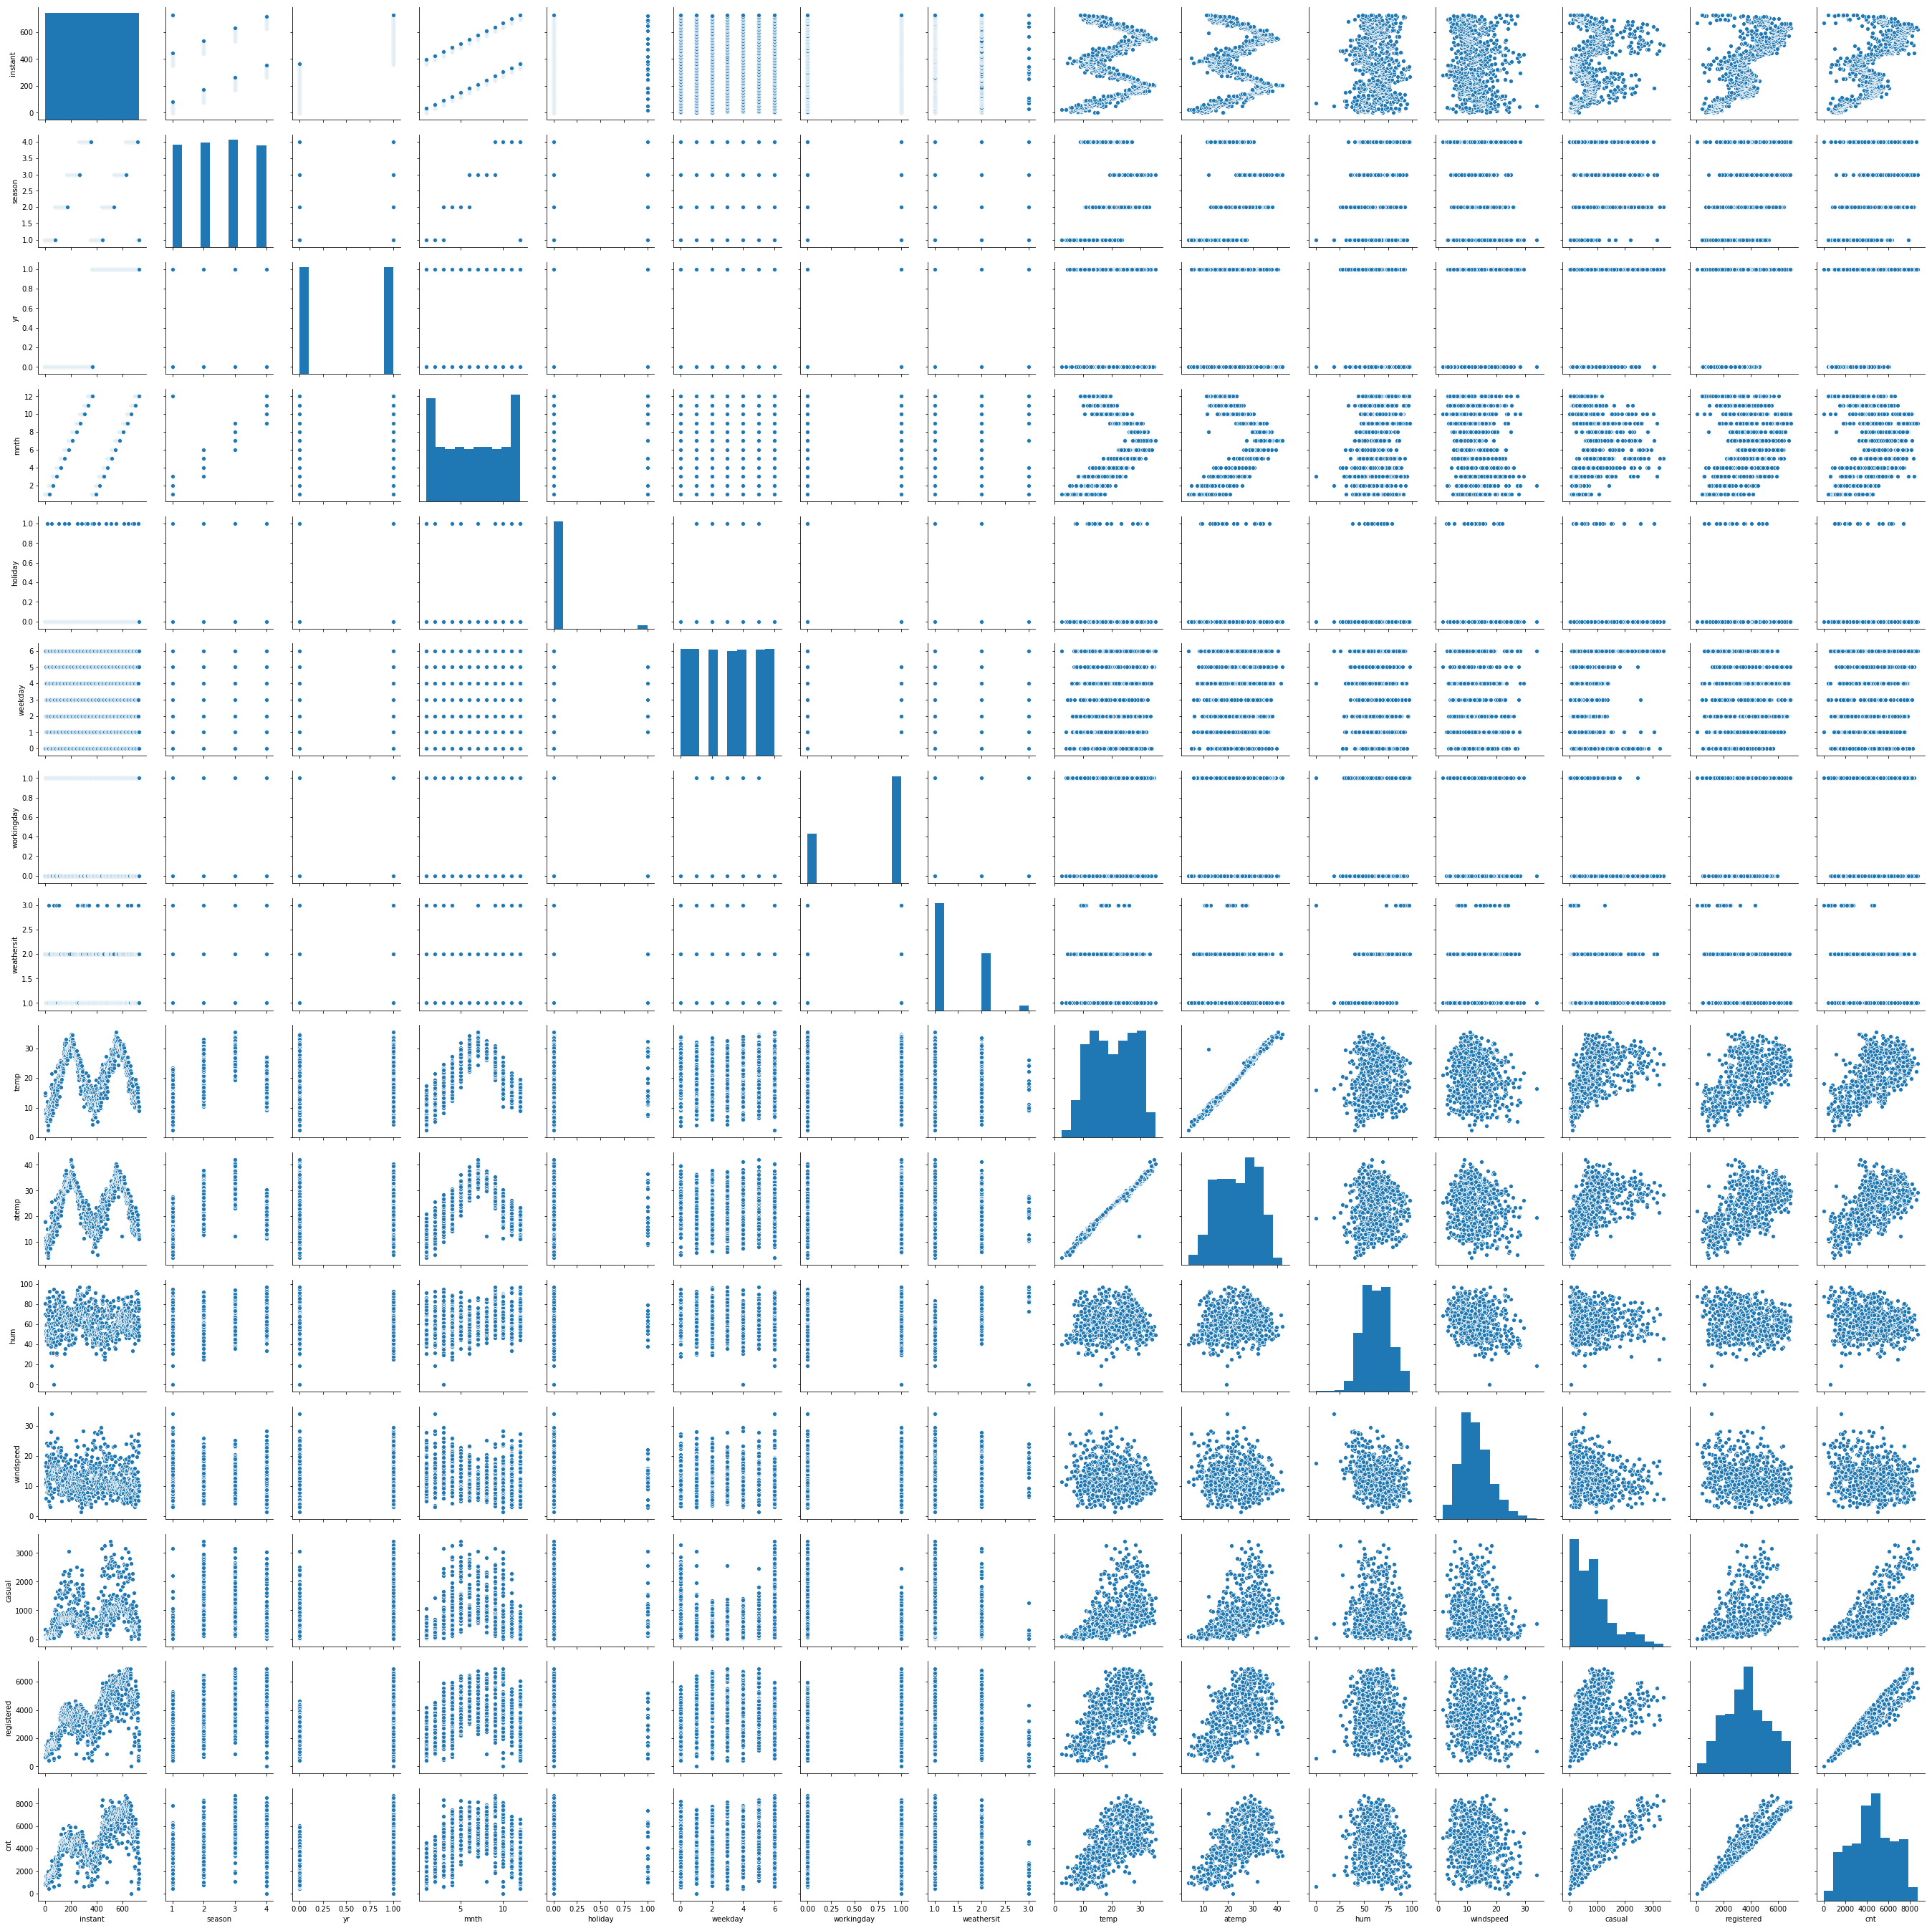

In [8]:
## visualizing the numeric data 
sns.pairplot(bike_data)
plt.show()

### 2. Data preparation 


In [12]:
### Converting some numeric values to categorical data
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [15]:
## maping seasons
bike_data.season = bike_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [16]:
## mapping weathersit
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [17]:
bike_data.head()

instant      dteday  season yr mnth holiday weekday workingday  \
0        1  01-01-2018  Spring  0  Jan       0       6          0   
1        2  02-01-2018  Spring  0  Jan       0       0          0   
2        3  03-01-2018  Spring  0  Jan       0       1          1   
3        4  04-01-2018  Spring  0  Jan       0       2          1   
4        5  05-01-2018  Spring  0  Jan       0       3          1   

      weathersit       temp     atemp      hum  windspeed   cnt  
0  Mist & Cloudy  14.110847  18.18125  80.5833  10.749882   985  
1  Mist & Cloudy  14.902598  17.68695  69.6087  16.652113   801  
2          Clear   8.050924   9.47025  43.7273  16.636703  1349  
3          Clear   8.200000  10.60610  59.0435  10.739832  1562  
4          Clear   9.305237  11.46350  43.6957  12.522300  1600

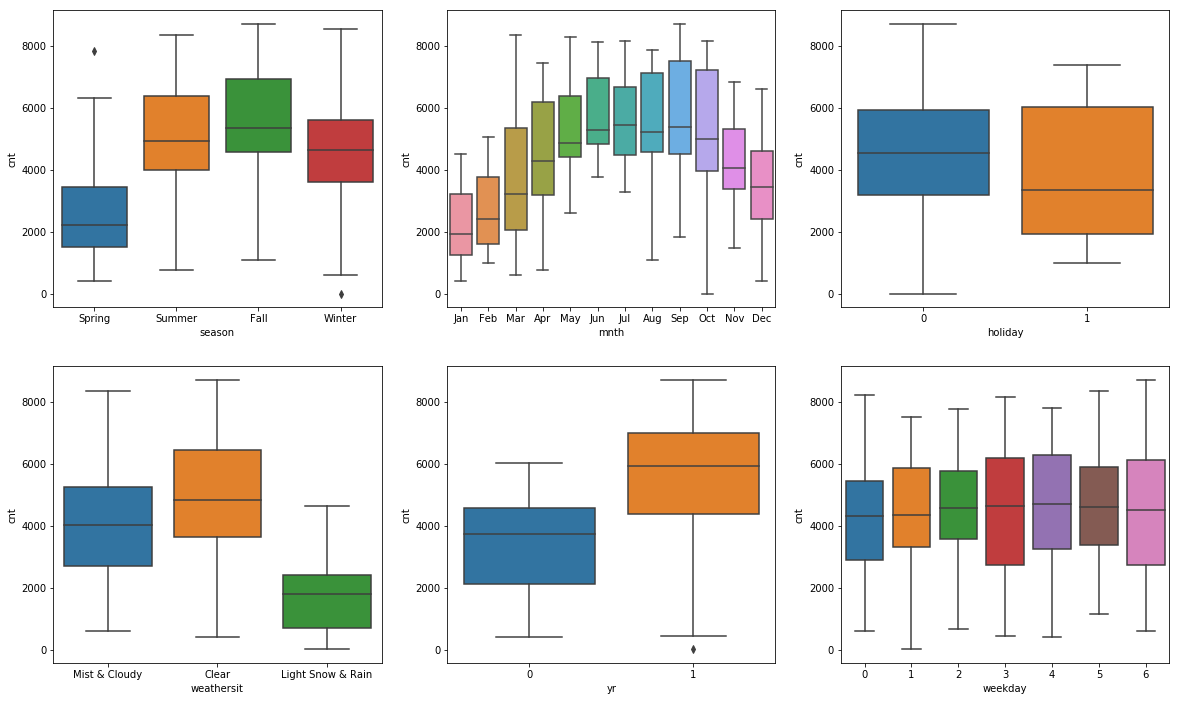

In [20]:
## visualizing these categorical variables against target variable cnt using a boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()


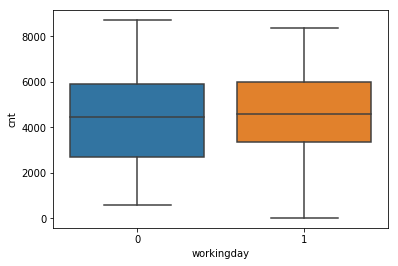

In [21]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)

In [23]:
### creating dummy variables for season , mnth ,weathersit ,weekday

dummy = bike_data[['season','mnth','weekday','weathersit']]

In [25]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [27]:
## adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [28]:
bike_data.head()


season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...   mnth  holiday  weekday  \
0         1         0         0         0  ...    Jan        0        6   
1         1         0         0         0  ...    Jan        0        0   
2         1         0         0         0  ...    Jan        0        1   
3         1         0         0         0  ...    Jan        0        2   
4         1         0         0         0  ...    Jan        0        3   

   workingday     weathersit       temp     atemp      hum  windspeed   cnt  
0           0  Mist & Cloudy  14.110847  18.18125  80.5833  10.749882   985  
1           0  Mist & Cloudy  14.902598  17.68695  69.6087  16.652113   801  
2           1          Clear   8.050924   9.47025  43.7273  16.636703  1349  
3           1          Clear   8.200000  10.60610  59.0435  10.739832  1562  
4           1          Clear   9.305237  11.46350  43.6957  12.522300  1600  

[5 rows x 36 columns]

In [29]:
## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [30]:
bike_data.head()

season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...   instant      dteday  yr  \
0         1         0         0         0  ...         1  01-01-2018   0   
1         1         0         0         0  ...         2  02-01-2018   0   
2         1         0         0         0  ...         3  03-01-2018   0   
3         1         0         0         0  ...         4  04-01-2018   0   
4         1         0         0         0  ...         5  05-01-2018   0   

   holiday  workingday       temp     atemp      hum  windspeed   cnt  
0        0           0  14.110847  18.18125  80.5833  10.749882   985  
1        0           0  14.902598  17.68695  69.6087  16.652113   801  
2        0           1   8.050924   9.47025  43.7273  16.636703  1349  
3        0           1   8.200000  10.60610  59.0435  10.739832  1562  
4        0           1   9.305237  11.46350  43.6957  12.522300  1600  

[5 rows x 32 columns]

## 2. Spliting data into train and test

In [33]:
train,test = train_test_split(bike_data, train_size = 0.7, random_state = 100)